## 获取数据集
http://yann.lecun.com/exdb/mnist/

In [1]:
import struct
struct.pack('>i', 2)  # 压缩一个2为int类型 输出位类型

b'\x00\x00\x00\x02'

<img style="float: left;" src="./g1.png" width=600 height=600>

<img style="float: left;" src="./g2.png" width=600 height=600>


### 1. 字节流加载并解析数据

In [2]:
import struct
with open('./MNIST_data/train-images-idx3-ubyte','rb') as f:
    buffer = f.read(4 * 4)  #  4 * 4个字节 = 16个bytes = 4 个int = 
    head = struct.unpack('>iiii', buffer)  # 4个i 表示解析4个int类型
    print(head)  # 2015个魔法数字，60000张图，每张图28行，28列
    length = head[1] * head[2] * head[3]  # head[1-3]代表图片数、行数、列数
    print(length)
    buffer = f.read(length)  # 读取图片总字节数
    data = struct.unpack('>{}B'.format(length), buffer)  # 解析图片总字节数，data为元组类型

(2051, 60000, 28, 28)
47040000


In [3]:
import numpy as np
imgs = np.reshape(data, (head[1], head[2], head[3]))  # 重塑data
imgs.shape  # 60000

(60000, 28, 28)

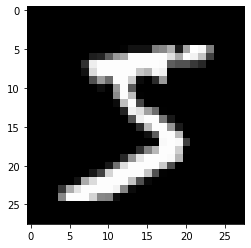

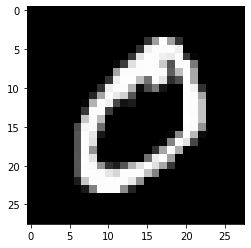

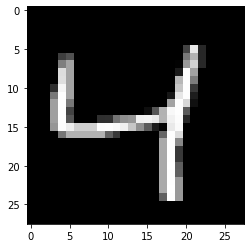

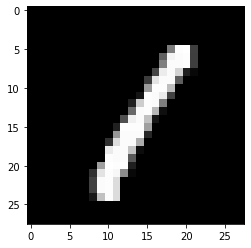

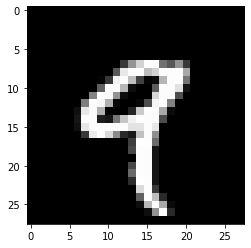

In [4]:
import matplotlib.pyplot as plt
# 画出前五个图片。一共60000张图，每张图28行，28列。
for i in range(5):
    plt.imshow(imgs[i], cmap = 'gray')
    plt.show()

### 2. sklearn加载数据

In [5]:
# sklearn 2.0以上使用openml
# 版本大等于 2.0 
# pip uninstall scikit-learn
# pip install scikit-learn == 0.19.2
from sklearn.datasets import fetch_mldata  
mnist = fetch_mldata('MNIST original', data_home='./') 
mnist

d:\python3.7.5\lib\site-packages\sklearn\feature_extraction\text.py:17: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping, defaultdict


{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [6]:
X, y = mnist['data'], mnist['target']

In [7]:
X.shape # 包含训练集60000个数据，测试集10000个数据

(70000, 784)

In [8]:
y.shape

(70000,)

### 3. 绘制内容

In [9]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

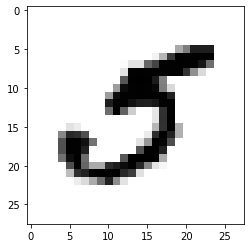

In [10]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
# binary表示白底黑字
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary)
plt.show()

In [11]:
y[36000]

5.0

### 4. 建立测试集和训练集

In [12]:
# 切片取数据
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [13]:
# 将数据集合交叉洗牌，交叉验证时，每个子集合数据分布均匀，有些机器学习算法对训练实例的顺序敏感
import numpy as np
shuffle_index = np.random.permutation(60000)  # 6万个数随机排序后的索引
shuffle_index 

array([16568, 10322,  5591, ..., 35700, 48090,  7174])

In [14]:
# 重新赋值
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

### 二元分类器-SGD

In [15]:
# 识别数字5 ，二元分类5或者非5
# 创建目标向量
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5) 
y_train_5.reshape(20, -1)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False,  True],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ...,  True, False, False]])

In [16]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)  # 传入训练集和 是5的标签
sgd_clf.predict([some_digit])  # 预测结果

d:\python3.7.5\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([ True])

## 性能考核
### 使用交叉验证测量精度

In [17]:
# 评估分类器比评估回归器要困难得多

# 3个cv折叠，正确率达到 95% 以上
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

d:\python3.7.5\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
d:\python3.7.5\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
d:\python3.7.5\lib\site-packages\sklearn\linear_mode

array([0.96075, 0.95855, 0.96375])

## 构造一个分类器-将每张图都分类成5

In [18]:
# 把每张图都分类成 非5
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90815, 0.90835, 0.91245])

* 准确率超过90% ，因为5的图像大约只有10%，你猜一张图不是5， 90%的时间你都是正确的
* 这说明准确率无法成为分类器的首要性能指标，特别是当你处理偏科数据集， 某些类比其他类更为频繁

## 混淆矩阵

In [19]:
# 评估分类器性能的更好方法是混淆矩阵
# A类别实例被分为B类别次数
# 想要知道分类器将数字3和数字5混淆多少次，通过混淆矩阵的5行3列
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

d:\python3.7.5\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
d:\python3.7.5\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
d:\python3.7.5\lib\site-packages\sklearn\linear_mode

### cross_val_predict 与 cross_val_score 相比
* 同样执行交叉验证
* 返回的不是评估分数，是每个折叠的预测
* 每一个实例在模型预测时使用的数据，在训练期间从未见过

In [20]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)  # 完全结果和预测结果混合的混淆矩阵

array([[53787,   792],
       [ 1547,  3874]], dtype=int64)

In [21]:
# 行表示实际类别，列表示预测类别
# 第一行 第一列 53272 被正确的分为 非5 ，真负类
# 第一行 第二列 1307 被错误的分类成 5 ，假正类
# 第二行 第一列 1077 张被错误的分为 非5， 假负类
# 第二行 第二列 4344 张被正确的分在了5 ，真正类
# 这种衡量方式太复杂，我们可以用更简单的指标

In [22]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)




## 正类预测的准确率 被称为分类器的精度


$
\text{精度} = \cfrac{TP}{TP + FP}
$

TP是真正类的数量，FP是假正类的数量



$
\text{召回率TPR} = \cfrac{TP}{TP + FN}
$

FN是假负类的数量

* 检测正类实例的比例
![jupyter](./zhaohui.jpg)



## 精度和召回率

In [23]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)  # 精度 =  4327 / 4327 + 1276

0.8302614659237034

In [24]:
recall_score(y_train_5, y_train_pred)  #  召回率 =  4327 / 4327 + 1094

0.7146282973621103

In [25]:
# 说明 检测一张图的时候，只有90%的概率是准确的，而且只有64%的数字5 被它检测出来
# 精度和召回率合成单一指标，成为 F1 分数，谐波平均值
# 平均值平等对待所有的值，谐波平均值会给予较低值更高的权重，只有召回率和精度都很高时，才能获得较高的F1分数


![jupyter](./quanheng.jpg)

* SGDClassifier对每个实例基于决策函数计算一个分值，大于阀值为正类，否则为负类
* 中间阀值右侧找到4个真正类 真5 ， 一个假正类 6， 精度为 4/5 80%
* 在所有的6个 真正的5 中，分类器找到了4个，召回率为 4/6 67%
* 提高阀值，向右移动，精度提高，召回降低
* 反之阀值降低，召回提高，精度降低
* SKlearn不可以直接设置阀值，可以访问决策分数，
* SGDClassifier 默认阀值为0 

In [26]:
# 如何设置阀值

# 用predict_proba得到每个实例属于正类的概率，然后对概率切一下。以LogisticRegression为例
# clf = LogisticRegression()
# clf.fit(X_train, y_train)
# pred_proba = clf.predict_proba(X_test)[:, 1]
# threshold = 0.75  # 阀值设置为0.75
# pred_label = pred_proba > threshold

# pred_proba是每个实例为真的概率
# 假设阈值是0.75
# pred_label里True就是概率大于0.75的

In [27]:
# decision_function返回决策值
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([110731.97142777])

In [28]:
threshold = 0  # 取阀值为0
y_some_digit_pred = (y_scores > threshold)  # 判断决策值大于阀值
y_some_digit_pred

array([ True])

In [29]:
# 提高阀值可以降低召回率，提高阀值到200000，就错了这个图
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [30]:
# 如何决定使用什么阀值
# 交叉预测decision_function返回决策值，而不是预测结果
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

d:\python3.7.5\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
d:\python3.7.5\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
d:\python3.7.5\lib\site-packages\sklearn\linear_mode

In [31]:
# 有了y_scores，可以计算所有可能的阀值的精度和召回率
y_scores.shape

(60000,)

## PR(Precision - Recall)曲线
**正类非常少或者更关注假正类而不是假负类**
- 绘制精度和召回率

1. 绘制精度和召回相对于阀值的函数图

In [32]:
from sklearn.metrics import precision_recall_curve

# 传入是5标签y_train_5和决策值数组y_scores  取得精度 召回率 阀值
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

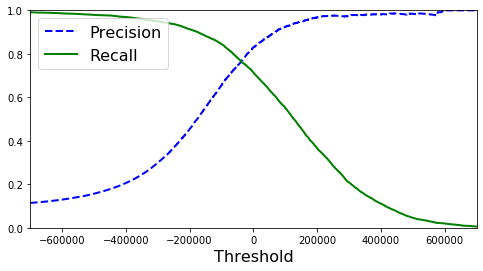

In [33]:
# 使用matplotlib 绘制精度和召回相对于阀值的函数图
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    # 以阀值为横轴x 以精度为纵轴y 绘制曲线
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    # 以阀值为横轴x 以召回为纵轴y 绘制曲线
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    # 横轴文本框
    plt.xlabel("Threshold", fontsize=16)
    # 显示提示框
    plt.legend(loc="upper left", fontsize=16)
    # 纵轴限制起始0至1
    plt.ylim([0, 1])

# 配置图片大小
plt.figure(figsize=(8, 4))
# 调用函数传入参数，绘制出曲线
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
# 横轴限制起始
plt.xlim([-700000, 700000])
# 显示图片
plt.show()

2. 精度和召回的曲线图

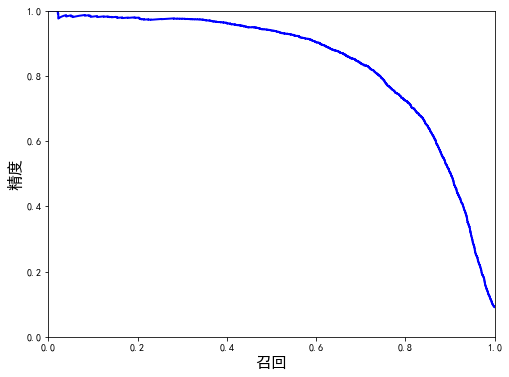

In [34]:
plt.rcParams['font.sans-serif'] = ['SimHei']

# 以召回为横轴x 以精度为纵轴y 绘制曲线
def plot_precision_vs_recall(precisions, recalls):
    # 以召回为横轴x 以精度为纵轴y 绘制曲线
    plt.plot(recalls, precisions, "b-", linewidth=2)
    # 横轴文本框
    plt.xlabel("召回", fontsize=16)
    # 纵轴文本框
    plt.ylabel("精度", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

## 通过选择阀值来实现最佳的精度/召回率权衡

In [35]:
# 目标设定为90%的精度，阀值大概在30000左右 , 设置了阀值为30000
y_train_pred_90 = (y_scores > 30000)

In [36]:
precision_score(y_train_5, y_train_pred_90)

0.8626701695724862

In [37]:
recall_score(y_train_5, y_train_pred_90)

0.6662977310459325

## 精度召回总结
* 获得了一个90%精度的分类器，但如果召回太低，精度再高，也不怎么有用
* 如果工作中，需要**99%的精度**，你应该回应，**召回率**是多少？

## ROC 曲线
Receiver Operating Characteristic Curve，中文名字叫“受试者工作特征曲线”
 - 本质是 **真正类率TPR**和**假正类率FPR**__的比例__（错误的分为正类的负类实例比例）
 - 与召回/精度曲线非常相似

In [38]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

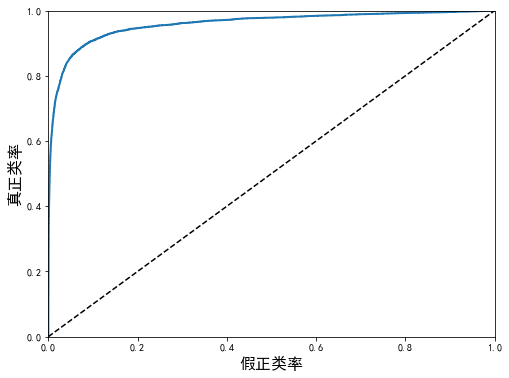

In [39]:
plt.rcParams['font.sans-serif'] = ['SimHei']
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('假正类率', fontsize=16)
    plt.ylabel('真正类率', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)

plt.show()

### AUC（Area Under Curve）
- 被定义为ROC曲线下与坐标轴围成的面积，显然这个面积的数值不会大于1

In [40]:
# 计算曲线下面积AUC，虚线是随机分类0.5到1
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9586344817908701

## PR和ROC总结
* 关于PR曲线：召回率越高，分类器的假正类率FPR就越高
* ROC的虚线表示纯随机分类器的曲线，好的分类器应该远离这条线，向左上角靠拢
* 是使用精度/召回率 PR曲线，还是使用ROC，关键在于 正类非常少或者更关注假正类而不是假负类，选择PR，反之ROC
* 例如：前面例子PR曲线很不错是因为跟负类 非5 相比， 正类 数据5 数量真的很少

## 训练随机森林分类器，比较SGD分类器的ROC曲线和ROC AUC分数

* 获取训练集中每个实例的分数
* **RandomForestClassifier 没有descision_function()，但是拥有dict_proda()方法，sklearn中分类器都有这两个中的一个**
* dict_proda**返回一个矩阵**，每行一个实例，每列代表一个类别的概率，比如这个图片 70%是5

In [41]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

d:\python3.7.5\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [42]:
# 两列，第一列为是的概率，第二列为不是的概率  每一行两列概率之和为1
y_probas_forest  # 矩阵内的数都是类别的概率

array([[1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       ...,
       [0.1, 0.9],
       [1. , 0. ],
       [1. , 0. ]])

In [43]:
# 绘制ROC曲线，需要决策值不是概率
# 此处直接使用正类的概率作为决策值：
y_scores_forest = y_probas_forest[:, 1]  # 取概率为是的一列

# FPR TPR 阀值
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

In [44]:
y_scores_forest

array([0. , 0. , 0. , ..., 0.9, 0. , 0. ])

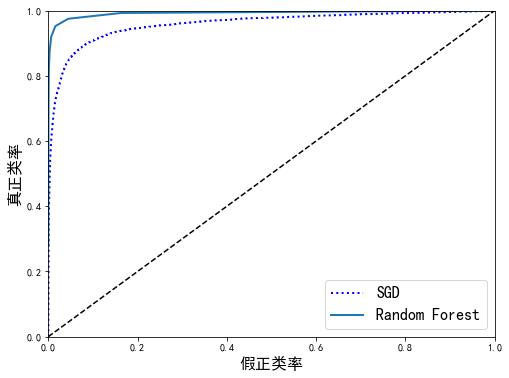

In [45]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [46]:
# Rand 比SGD 好很多，ROC AUC的分数也高很多
roc_auc_score(y_train_5, y_scores_forest)

0.9922621112273469

In [47]:
# 再看一下 精度和召回率 也很高
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9856194690265486

In [48]:
recall_score(y_train_5, y_train_pred_forest)

0.8218040951853901

## 总结
* 选择合适的指标利用交叉验证来对分类器进行评估
* 选择满足需求的精度/召回率权衡
* 使用ROC曲线和ROC AUC分数比较多个模型

## 多类别分类器
* 尝试5 之外的检测
* 多类别分类器 区分两个以上的类别
* 随机森林和朴素贝叶斯可以直接处理多个类别
* 支持向量机svm和线性分类器只可以处理二元分类器

**SVM和线性分类器需要进行变换才能处理多类别**

## 二元分类器转多元的解决方案
#### 1. OvA

**实现思路：**将数字图片分类0到9，训练10个二元分类器，每个数字一个，检测一张图片时，获取每个分类器的决策分数，哪个最高属于哪个，称为一对多OvA 

**优点：**速度快、适用大训练集
#### 2. OvO

**实现思路：**为每一对数字训练一个二元分类器，区分0，1 区分0，2 区分1，2 称为一对一OvO策略，存在N个类别，需要N*（N-1）/2个分类器，最后看哪个类别获胜最多

**优点：**分类全面、适用小训练集

### Sklearn多元分类器
sklearn检查到使用二元分类算法进行多类别分类任务，会自动运行OvA，SVM分类器除外

#### SGD执行多类别分类

#### SGD-OvA

In [49]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train)  # 传入训练集和所有标签
sgd_clf.predict([some_digit])  # 预测结果

d:\python3.7.5\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([5.])

#### 观察决策分数

In [50]:
# 内部实际上训练了10个二元分类器，获得图片的决策分数，然后选择了分数最高的类别
# 返回10个分数，每个类别1个
some_digit_scores = sgd_clf.decision_function([some_digit]) # decision_function返回决策值
some_digit_scores

array([[-220042.03948291, -537278.45085165, -309851.96535222,
        -111620.36271146, -370859.03989159,  110731.97142777,
        -927326.41294153, -344626.56245925, -571341.24036671,
        -688056.27826362]])

In [51]:
np.argmax(some_digit_scores)  # argmax返回决策最大值的索引

5

In [52]:
# 目标类别列表会存储在classes_这个属性中，按值大小排列，
sgd_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [53]:
sgd_clf.classes_[np.argmax(some_digit_scores)]  # 取到分类的过程

5.0

#### SGD-OvO

In [54]:
# 使用OvO策略，一对一或者一对多
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, tol=-np.infty, random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([5.])

In [56]:
len(ovo_clf.estimators_)  # 估算器个数 n * (n - 1) / 2

45

#### 随机森林多类别

In [57]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
# 使用随机森林
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([5.])

In [58]:
# 随机森林直接将实例分为多个类别，调用predict_proba()可以获得分类器将每个实例分类为每个类别的概率列表
forest_clf.predict_proba([some_digit])

array([[0. , 0. , 0. , 0.2, 0. , 0.8, 0. , 0. , 0. , 0. ]])

## 评估分类器

In [59]:
# 使用交叉验证评估SGD的准确率
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

d:\python3.7.5\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
d:\python3.7.5\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
d:\python3.7.5\lib\site-packages\sklearn\linear_mode

array([0.86287742, 0.86564328, 0.86953043])

### StandardScaler对数据进行缩放，提高准确率

In [62]:
# 将输入进行简单缩放 ，可以得到准确率 90 %以上
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # StandardScaler对数据进行缩放 
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64)) # astype 修改数据类型 - 强制类型转换
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

d:\python3.7.5\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
d:\python3.7.5\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
d:\python3.7.5\lib\site-packages\sklearn\linear_mode

array([0.90841832, 0.91059553, 0.90878632])

## 错误分析

### 项目流程
1. 探索数据准备的选项
2. 尝试多个模型
3. 选择最佳模型并用GridSearchCV对参数进行微调
4. 尽可能自动化


### 确定了一个相对合适的模型，进一步优化，分析其错误类型
* 查看混淆矩阵
* 使用cross_val_predict()进行预测
* 调用confusion_matrix()

In [63]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx  # 理想情况是斜对角是最大值，其他都是0

d:\python3.7.5\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
d:\python3.7.5\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
d:\python3.7.5\lib\site-packages\sklearn\linear_mode

array([[5713,    3,   19,   14,   10,   62,   50,   10,   40,    2],
       [   1, 6465,   50,   23,    6,   37,    7,    8,  131,   14],
       [  51,   34, 5343,  100,   79,   23,   92,   55,  164,   17],
       [  49,   42,  144, 5331,    1,  223,   38,   59,  140,  104],
       [  18,   29,   38,    8, 5357,    6,   54,   33,   92,  207],
       [  69,   38,   35,  186,   73, 4589,  117,   26,  182,  106],
       [  31,   25,   45,    1,   38,   87, 5641,    7,   43,    0],
       [  23,   23,   69,   27,   51,    9,    5, 5812,   15,  231],
       [  45,  152,   75,  168,   11,  153,   59,   28, 5009,  151],
       [  41,   32,   30,   88,  156,   30,    3,  201,   72, 5296]],
      dtype=int64)

- 行代表实际类别，列代表预测类别
- (0, 0)：实际类别为0，预测类别为0，正确分类
- (1, 2)：实际类别为1，预测类别为2，被错误预测为2
- (3, 2)：实际类别为3，预测类别为2，被错误预测为2
- **斜对角为被正确预测的真正类**

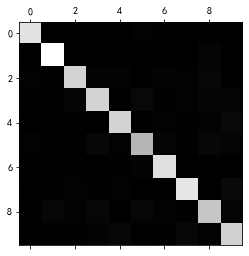

In [64]:
# 使用matplotlib的matshow 函数来查看混淆矩阵的图像表示
plt.matshow(conf_mx, cmap = plt.cm.gray)
plt.show() 
# 数值越小颜色越深，小数字为黑色；数值越大颜色越亮，第二个方格最亮
# 5的方块比较暗，需要优化：1、5的数据集比较小   2、分类器在5上执行效果不好

In [65]:
# 看起来不错，大多数图片都在主对角线上，说明它们被正确分类
# 数字5 看起来比较暗，说明1. 数字5图片较少  2. 分类器在数字5上执行效果不如其他数字上好
# 假设把焦点放在错误上，为取得错误率，而不是错误绝对值，需要将混淆矩阵中每个值除以相应类别中的图片数量

row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

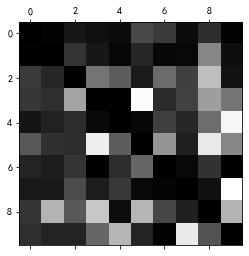

In [66]:
# 用0填充对角线 只保留错误，重新绘制
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [67]:
# 每行代表实际类别，每列代表预测类别
# 8，9列比较亮，说明许多图片被错误的分类为数字8，9
# 类别8，9行也偏亮，说明数字8和9经常会跟其他数字混淆
# 有些很暗，比如行1，大多数数字1都被正确的分类，一些和8混淆
# 5和3是错误最多的

## 结论
* 改进数字8和9的分类
* 修正数字3和5的混淆

## 如何优化分类器
* 尝试多收集这些数字的训练集
* 开发一些新特征来改进分类器
* 优化分类器算法
* **使用pillow或opencv对图片预处理，让显示模型更突出** 作业
* 分析单个错误

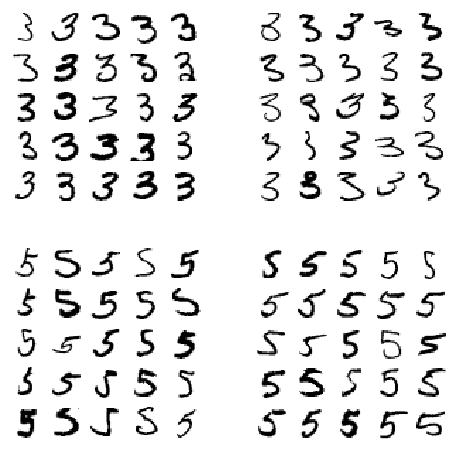

In [68]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")


# 查看数字3和数字5的例子
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)] # 实际为3，预测为3
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)] # 实际为3，预测为5
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)] # 实际为5，预测为3
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)] # 实际为5，预测为5

plt.figure(figsize=(8,8))
plt.subplot(221); 
plot_digits(X_aa[:25], images_per_row=5)  # 实际为3，预测为3
plt.subplot(222); 
plot_digits(X_ab[:25], images_per_row=5)  # 实际为3，预测为5
plt.subplot(223);
plot_digits(X_ba[:25], images_per_row=5)  # 实际为5，预测为3
plt.subplot(224); 
plot_digits(X_bb[:25], images_per_row=5)  # 实际为5，预测为5
plt.show()

In [69]:
# 左侧两个是被分类为3的图片
# 右侧两个是被分类为5的图片
# 大多数错误分类的图片看起来还是非常明显的错误
# 原因：SGD是一个线性模型，它所做就是为每个像素分配一个各个类别的权重，当它看到新的图像，将加权后的像素强度汇总，从而得到一个分数进行分类
# 数字3和5在一部分像素位上有区别，所以分类器很容易将其弄混
# 通过上面图像，如果书写3 的连接点左移，分类器可能将其分类为数字5，这个分类器对图像位移和旋转敏感
# 减少混淆的方法之一，就是对图像进行预处理，确保位于中心位置并且没有旋转

## 多标签分类

In [70]:
# 为每个实例产生多个类别 ，例如 照片识别多个人脸
# 分类器经过训练可以识别小红，小白，小军，一张照片 里有 小红，小白
# 经过分类器，应该输出[1,1,0]， 是小红，是小白，不是小军
# 输出多个二元标签的分类系统称为多标签分类系统

In [71]:
# K最近邻(kNN，k-NearestNeighbor)分类算法
from sklearn.neighbors import KNeighborsClassifier 

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]  # np.c_行连接两个矩阵，就是把两矩阵左右相加，要求行数相等。

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [72]:
# knn支持多标签分类，不是所有的分类器都支持
knn_clf.predict([some_digit])

array([[False,  True]])

In [73]:
# # 评估多标签分类器方法很多，方法之一就是测量每个标签的F1分数，或者其他二元分类器指标，然后简单平均
# y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
# f1_score(y_multilabel, y_train_knn_pred, average="macro")
0.977090

0.97709

In [74]:
# 上面假设了所有标签都同等重要，也可以给每个标签设置一个权重（该目标标签实例的数量），设置average='weighted'

### KNN图片去噪声

### 例子：构建一个系统去除图片中的噪声，输入一张有噪声的图片，它将输入一张干净的数字图片，分类器输出是多个标签，一个像素一个标签，每个标签多个值0到255

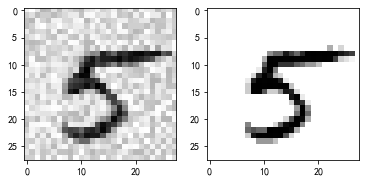

In [75]:
# 增加噪声，目标将图片还原为原始图片 创建训练集和测试集
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise  # 训练集添加噪声
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise  # 测试集添加噪声
y_train_mod = X_train  # 取原始训练集
y_test_mod = X_test  # 取原始测试集

some_index = 5500
plt.subplot(121);plt.imshow(X_test_mod[some_index].reshape(28, 28), cmap = matplotlib.cm.binary)
plt.subplot(122);plt.imshow(y_test_mod[some_index].reshape(28, 28), cmap = matplotlib.cm.binary)
plt.show()

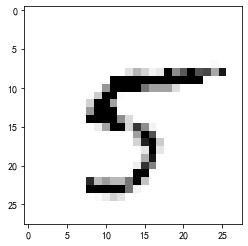

In [76]:
knn_clf.fit(X_train_mod, y_train_mod)  # 训练
clean_digit = knn_clf.predict([X_test_mod[some_index]])  # 预测

plt.imshow(clean_digit.reshape(28, 28), cmap = matplotlib.cm.binary)
plt.show()